# Curso: Bioestat√≠stica ‚Äî Experimento Fatorial DBC (Delineamento em Bloco Casualizado)
## Autores: Sandro da Silva Camargo e Fernando Cardoso

**Problema**: Um pesquisador objetiva avaliar as medidas biom√©tricas das carca√ßas e o tamanho dos √≥rg√£os internos de bovinos alimentados com diferentes fontes prot√©icas e volumosos na fase de termina√ß√£o.

Para tal, foi elaborado um experimento com dois fatores qualitativos, em
delineamento DBC com quatro repeti√ß√µes (blocos). A vari√°vel medida
foi o perƒ±ÃÅmetro da garupa (cm).

Tipos de Volumosos:
* V1: Brachiaria brizantha
* V2: Cana de a√ß√∫car picada
* V3: Silagem de milho

Fontes Prot√©icas:
* P1: Ureia
* P2: Farelo de soja

Estrutura experimental:
Para estudar simultaneamente os efeitos desses dois fatores e sua poss√≠vel intera√ß√£o, o pesquisador planejou um experimento fatorial 3√ó2, resultando em seis combina√ß√µes de tratamentos:

|Tratamento|Volumoso|Fonte Prot√©ica|
|:--|:--:|:--:|
|V1P1	|Brachiaria brizantha	|Ureia|
|V2P1	|Cana de a√ß√∫car picada	|Ureia|
|V3P1	|Silagem de milho	|Ureia|
|V1P2	|Brachiaria brizantha	|Farelo de soja|
|V2P2 |Cana de a√ß√∫car picada |Farelo de soja|
|V2P3 |Silagem de milho|Farelo de soja|

Cada tratamento ser√° aplicado a quatro unidades experimentais, permitindo comparar as m√©dias de produ√ß√£o entre os grupos.

Objetivo:
*  Verificar os efeitos principais de Volumoso e Fonte Prot√©ica;
*  Verificar a intera√ß√£o entre os fatores, isto √©, se o efeito de um fator depende da presen√ßa do outro.

A base de dados est√° dispon√≠vel [aqui](https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/fatorial-dbc-dados.txt).

Abra este c√≥digo no seu google colab [clicando aqui](https://colab.research.google.com/github/Sandrocamargo/biostatistics/blob/master/python/bioe_05_fatorial_dbc.ipynb).

# Carga de bibliotecas

In [1]:
!pip install pingouin
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import pingouin as pg

# Carga dos dados e defini√ß√£o dos nomes das colunas

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/fatorial-dbc-dados.txt", sep="\t", header=0)

# Converte para fatores (categorias)
for col in ["TR", "VAR", "PROT", "BL"]:
    dados[col] = dados[col].astype("category")

# Renomeia para manter compatibilidade com R
dados.rename(columns={"PROT": "PR"}, inplace=True)

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   TR      24 non-null     category
 1   VAR     24 non-null     category
 2   PR      24 non-null     category
 3   BL      24 non-null     category
 4   PG      24 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.1 KB


# GR√ÅFICOS INICIAIS (OUTLIERS)

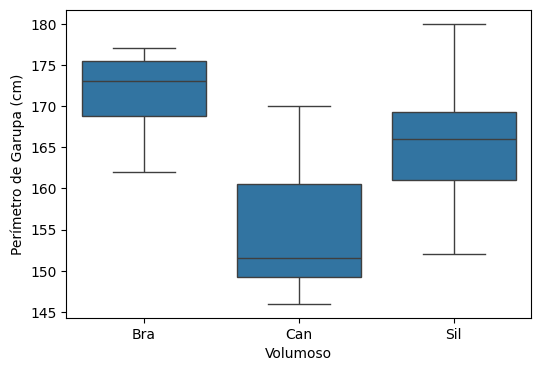

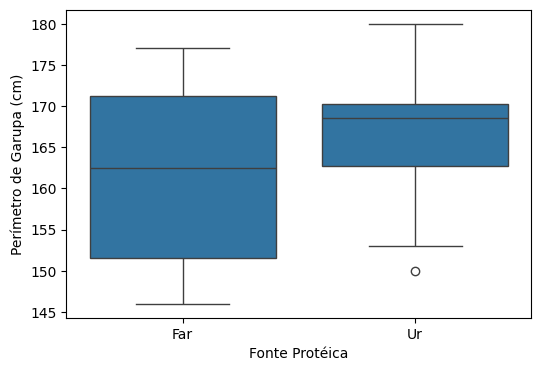

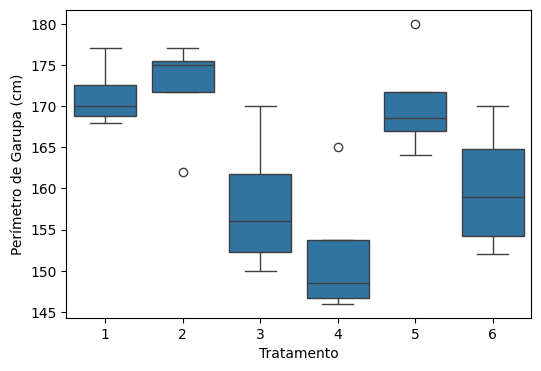

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="VAR", y="PG", data=dados)
plt.xlabel("Volumoso"); plt.ylabel("Per√≠metro de Garupa (cm)")
plt.savefig("fat1-boxplot-volumoso.pdf")

plt.figure(figsize=(6, 4))
sns.boxplot(x="PR", y="PG", data=dados)
plt.xlabel("Fonte Prot√©ica"); plt.ylabel("Per√≠metro de Garupa (cm)")
plt.savefig("fat1-boxplot-fonte.pdf")

plt.figure(figsize=(6, 4))
sns.boxplot(x="TR", y="PG", data=dados)
plt.xlabel("Tratamento"); plt.ylabel("Per√≠metro de Garupa (cm)")
plt.savefig("fat1-boxplot-tratamento.pdf")

# GR√ÅFICOS DE INTERA√á√ÉO

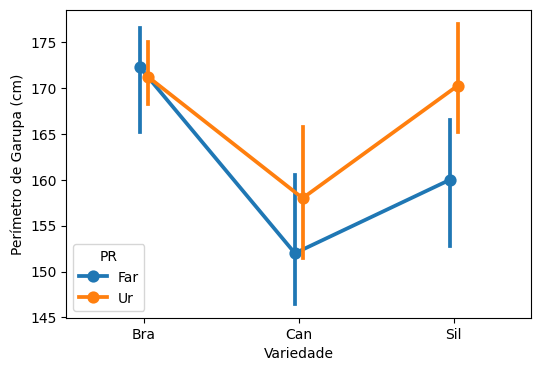

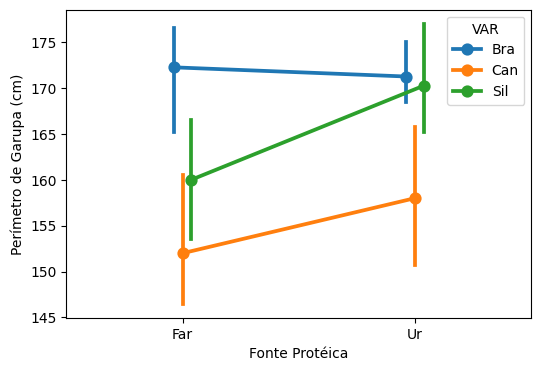

In [4]:
plt.figure(figsize=(6, 4))
sns.pointplot(x="VAR", y="PG", hue="PR", data=dados, dodge=True, markers="o")
plt.xlabel("Variedade"); plt.ylabel("Per√≠metro de Garupa (cm)")
plt.savefig("fat1-iter-variedade.pdf")

plt.figure(figsize=(6, 4))
sns.pointplot(x="PR", y="PG", hue="VAR", data=dados, dodge=True, markers="o")
plt.xlabel("Fonte Prot√©ica"); plt.ylabel("Per√≠metro de Garupa (cm)")
plt.savefig("fat1-iter-fonte.pdf")

# AN√ÅLISE DE VARI√ÇNCIA

In [5]:
modelo = ols("PG ~ C(VAR) + C(PR) + C(VAR):C(PR) + C(BL)", data=dados).fit()
print(modelo.summary())
anova = anova_lm(modelo, typ=2)
print("\n=== ANOVA ===")
print(anova)

                            OLS Regression Results                            
Dep. Variable:                     PG   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     7.399
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           0.000488
Time:                        23:59:22   Log-Likelihood:                -70.237
No. Observations:                  24   AIC:                             158.5
Df Residuals:                      15   BIC:                             169.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**üß† Qualidade geral do modelo**

*  R¬≤ = 0.798 ‚Üí o modelo explica cerca de 79,8% da varia√ß√£o total no per√≠metro de garupa.
*  R¬≤ ajustado = 0.690 ‚Üí considerando o n√∫mero de fatores, o ajuste ainda √© bom, indicando que o modelo √© adequado.
*  F(8,15) = 7.399; p = 0.000488 ‚Üí o modelo geral √© altamente significativo, ou seja, pelo menos um fator (ou intera√ß√£o) influencia o per√≠metro de garupa.


**üß© ANOVA dos efeitos**

|Fonte de varia√ß√£o|	gl|	F|	p-valor|	Interpreta√ß√£o|
|:--|:--:|:--:|:--:|:--|
|C(VAR)|	2	|17.45	|0.0001|	Altamente significativo ‚Üí o tipo de volumoso afeta o per√≠metro de garupa.|
|C(PR)|	1|	4.75	|0.0456|	Significativo ‚Üí a fonte proteica tamb√©m influencia o resultado.|
|C(BL)	|3	|5.20|	0.0116|	Significativo ‚Üí h√° varia√ß√£o entre blocos (diferen√ßas de condi√ß√µes ou animais).|
|C(VAR):C(PR)|	2|	1.98|	0.173|	N√£o significativo ‚Üí n√£o h√° intera√ß√£o relevante entre volumoso e fonte proteica.|

**‚û°Ô∏è Conclus√£o da ANOVA**

*  A intera√ß√£o entre volumoso e fonte proteica n√£o √© significativa, o que indica que os efeitos desses fatores s√£o aditivos (podem ser interpretados separadamente).

**‚öôÔ∏è Coeficientes do modelo**
|Termo|	Coef.|	p-valor|	Interpreta√ß√£o|
|:--|:--|:--|:--|
|Intercepto (179.96)|	‚Äî|	‚Äî|	M√©dia do grupo de refer√™ncia (Variedade = Bra, Prote√≠na = Far, Bloco 1).|
|C(VAR)[T.Can]| = -20.25|	0.000|	O volumoso ‚ÄúCan‚Äù reduz o PG em ~20 cm em rela√ß√£o a ‚ÄúBra‚Äù.	|
|C(VAR)[T.Sil]| = -12.25|	0.008|	O volumoso ‚ÄúSil‚Äù reduz o PG em ~12 cm em rela√ß√£o a ‚ÄúBra‚Äù.	|
|C(PR)[T.Ur]| = -1.00|0.808|	Fonte proteica ‚ÄúUr‚Äù n√£o difere significativamente da ‚ÄúFar‚Äù.	|
|C(BL)[T.2‚Äì4]||	p < 0.05|	H√° diferen√ßas entre blocos ‚Üí efeito de variabilidade experimental.	|
|Intera√ß√µes (VAR√óPR)||	p > 0.05|	Nenhuma intera√ß√£o significativa, confirmando o resultado da ANOVA.|


**üìä Diagn√≥sticos do modelo**
*  Teste de normalidade (Omnibus, JB): p > 0.4 ‚Üí res√≠duos seguem distribui√ß√£o normal.
*  Condi√ß√£o (Cond. No. = 10.3) ‚Üí sem multicolinearidade preocupante.
*  Durbin-Watson = 1.69 ‚Üí res√≠duos sem autocorrela√ß√£o relevante.
*  ‚û°Ô∏è As pressuposi√ß√µes da ANOVA parecem atendidas.


**üìà Interpreta√ß√£o pr√°tica**
*  O tipo de volumoso tem forte influ√™ncia sobre o per√≠metro de garupa ‚Äî ‚ÄúBra‚Äù (Braqui√°ria) apresentou os maiores valores.
*  A fonte proteica teve efeito menor, mas significativo (possivelmente apenas uma das fontes promove ganho marginal).
*  Blocos mostraram varia√ß√£o sistem√°tica, justificando o uso do delineamento em blocos.
*  Sem intera√ß√£o VAR√óPR, portanto as compara√ß√µes de m√©dias podem ser feitas separadamente por fator.

# DIAGN√ìSTICO DE PRESSUPOSI√á√ïES


Shapiro-Wilk Test:
ShapiroResult(statistic=np.float64(0.9408088275521843), pvalue=np.float64(0.17003548256970064))

Levene Test:
LeveneResult(statistic=np.float64(0.41090755593076356), pvalue=np.float64(0.83495621575186))

Durbin-Watson: 1.691


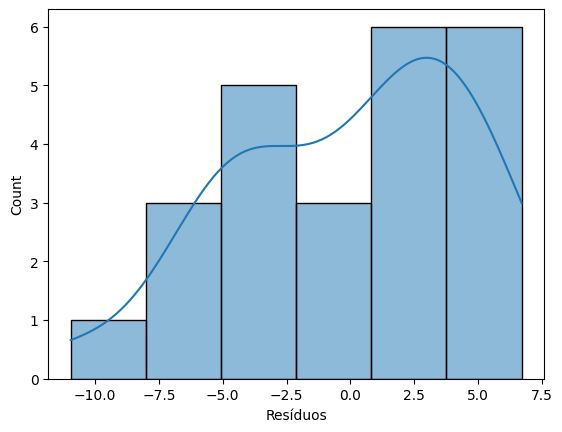

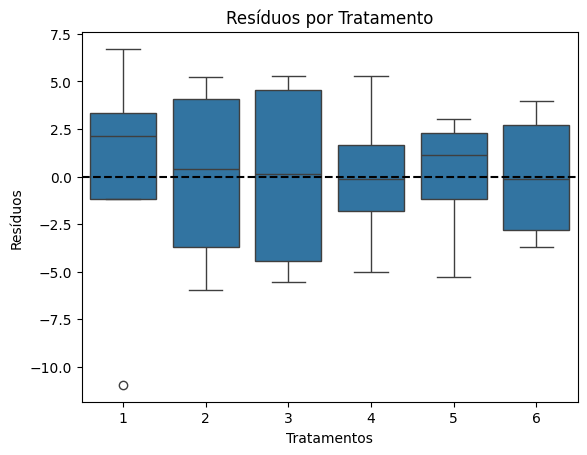

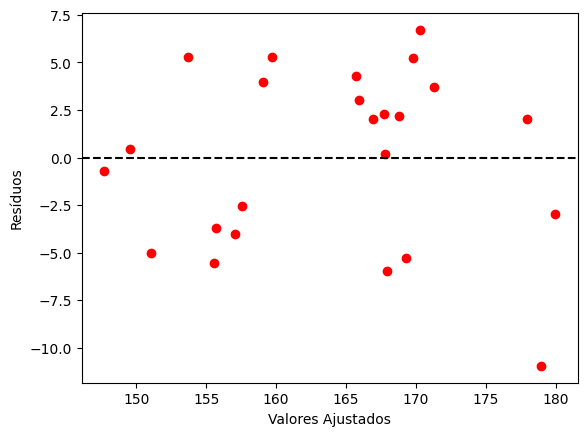

In [10]:
residuo = modelo.resid
ajustado = modelo.fittedvalues

# Normalidade dos res√≠duos
print("\nShapiro-Wilk Test:")
print(stats.shapiro(residuo))

plt.figure()
sns.histplot(residuo, kde=True)
plt.xlabel("Res√≠duos")
plt.savefig("fat1-hist-residuos.pdf")

# Homocedasticidade (teste de Levene)
print("\nLevene Test:")
print(stats.levene(*[residuo[dados["TR"] == tr] for tr in dados["TR"].unique()]))

plt.figure()
sns.boxplot(x="TR", y=residuo, data=dados)
plt.xlabel("Tratamentos")
plt.ylabel("Res√≠duos")
plt.title("Res√≠duos por Tratamento")
plt.axhline(0, color='black', linestyle='--')
plt.savefig("fat1-residuos-por-tratamento.pdf")

# Independ√™ncia (Durbin-Watson)
dw = sm.stats.durbin_watson(residuo)
print(f"\nDurbin-Watson: {dw:.3f}")

# Gr√°ficos diagn√≥sticos
plt.figure()
plt.scatter(ajustado, residuo, color='red')
plt.xlabel("Valores Ajustados")
plt.ylabel("Res√≠duos")
plt.axhline(0, color='black', linestyle='--')
plt.savefig("fat1-residuos-ajustados.pdf")

# TESTES DE TUKEY (compara√ß√µes m√∫ltiplas)



Tukey HSD para Variedade:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Bra    Can   -16.75 0.0009 -26.5984 -6.9016   True
   Bra    Sil   -6.625 0.2303 -16.4734  3.2234  False
   Can    Sil   10.125 0.0432   0.2766 19.9734   True
-----------------------------------------------------

Tukey HSD para Fonte Prot√©ica:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Far     Ur   5.0833 0.2328 -3.5091 13.6758  False
----------------------------------------------------

Tukey HSD para Tratamento:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      1.0    1.0 -15.7351 17.7351  False
     1      3   -13.25  0.171 -29.9851  3.4851  False

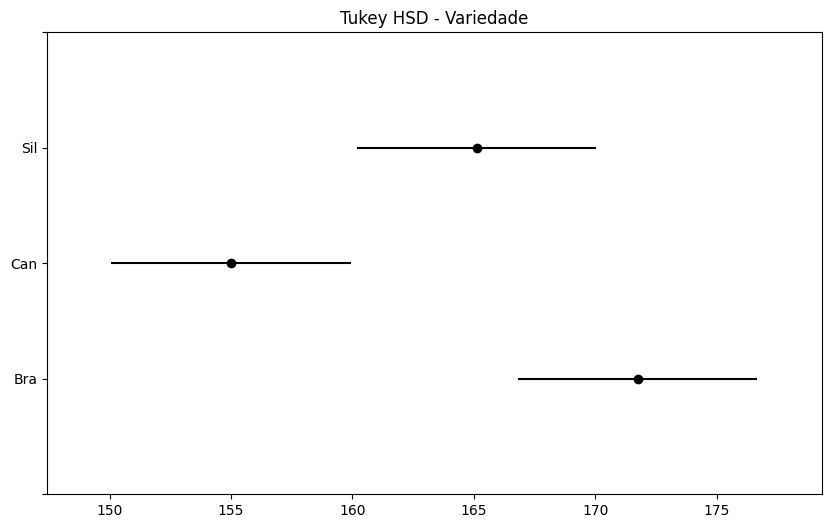

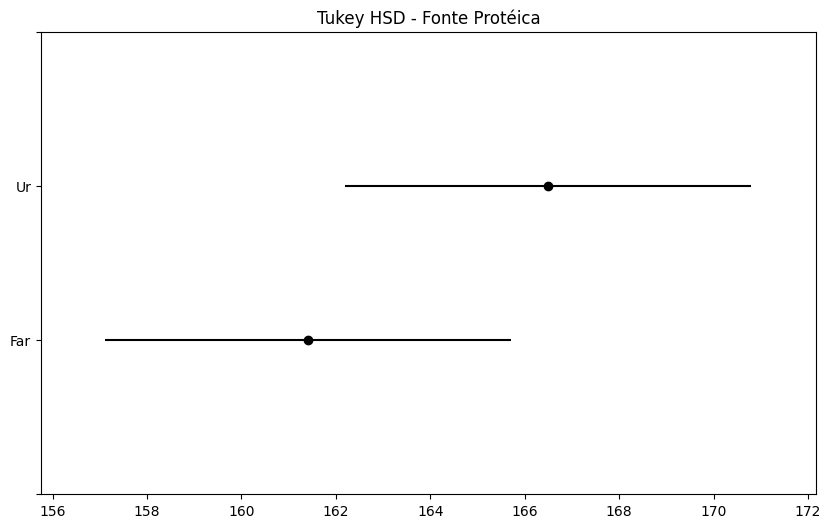

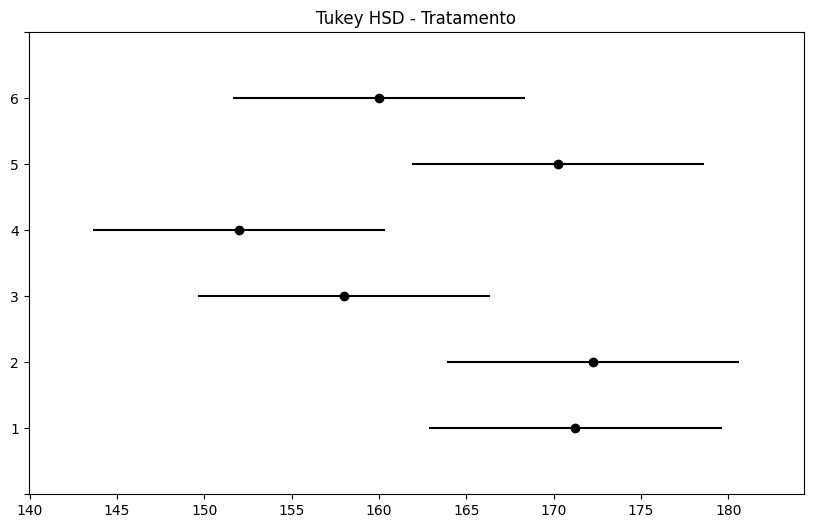

In [12]:
print("\nTukey HSD para Variedade:")
tukey_var = pairwise_tukeyhsd(dados["PG"], dados["VAR"])
print(tukey_var)

print("\nTukey HSD para Fonte Prot√©ica:")
tukey_pr = pairwise_tukeyhsd(dados["PG"], dados["PR"])
print(tukey_pr)

print("\nTukey HSD para Tratamento:")
tukey_tr = pairwise_tukeyhsd(dados["PG"], dados["TR"])
print(tukey_tr)

# Gr√°ficos de Tukey
tukey_var.plot_simultaneous()
plt.title("Tukey HSD - Variedade")
plt.savefig("fat1-tukey-variedade.pdf")

tukey_pr.plot_simultaneous()
plt.title("Tukey HSD - Fonte Prot√©ica")
plt.savefig("fat1-tukey-fonte.pdf")

tukey_tr.plot_simultaneous()
plt.title("Tukey HSD - Tratamento")
plt.savefig("fat1-tukey-tratamento.pdf")

In [14]:
# ----------------------------------------------------------
# M√âDIAS AGRUPADAS (equivalente ao emmeans + cld)
# ----------------------------------------------------------
print("\nM√©dias e Grupos de Variedade:")
pg.pairwise_tukey(dv="PG", between="VAR", data=dados)

print("\nM√©dias e Grupos de Fonte Prot√©ica:")
pg.pairwise_tukey(dv="PG", between="PR", data=dados)

print("\nM√©dias e Grupos de Tratamento:")
pg.pairwise_tukey(dv="PG", between="TR", data=dados)


M√©dias e Grupos de Variedade:

M√©dias e Grupos de Fonte Prot√©ica:

M√©dias e Grupos de Tratamento:


A  B  mean(A)  mean(B)   diff        se         T   p-tukey    hedges
0   1  2   171.25   172.25  -1.00  5.265849 -0.189903  0.999959 -0.153919
1   1  3   171.25   158.00  13.25  5.265849  2.516213  0.171013  1.678388
2   1  4   171.25   152.00  19.25  5.265849  3.655631  0.018964  2.438413
3   1  5   171.25   170.25   1.00  5.265849  0.189903  0.999959  0.154730
4   1  6   171.25   160.00  11.25  5.265849  2.136408  0.313257  1.525463
5   2  3   172.25   158.00  14.25  5.265849  2.706116  0.122449  1.563745
6   2  4   172.25   152.00  20.25  5.265849  3.845534  0.012765  2.222164
7   2  5   172.25   170.25   2.00  5.265849  0.379806  0.998785  0.253006
8   2  6   172.25   160.00  12.25  5.265849  2.326310  0.234161  1.413500
9   3  4   158.00   152.00   6.00  5.265849  1.139417  0.858560  0.590753
10  3  5   158.00   170.25 -12.25  5.265849 -2.326310  0.234161 -1.347855
11  3  6   158.00   160.00  -2.00  5.265849 -0.379806  0.998785 -0.204958
12  4  5   152.00   170.25 -18.25  5.265849 -3.465728  0.028034 -2.008028
13  4  6   152.00   160.00  -8.00  5.265849 -1.519223  0.657181 -0.819834
14  5  6   170.25   160.00  10.25  5.265849  1.946505  0.407934  1.186211